In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file from the resources folder
df = pd.read_csv("Resources/card_transdata.csv")

# Display the first few rows of the DataFrame
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.shape

(1000000, 8)

In [4]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [5]:
# Check for missing values
print(df.isnull().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


In [6]:
# Handle missing values (e.g., fill with mean, median, or mode)
df_na = df.fillna(df.mean())
df_na.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [7]:
# Check for duplicates
print(df.duplicated().sum())

0


In [8]:
#Variables**

#Distance_from_home : This could indicate unusual transaction locations.**

#Distance_from_last_transaction : Large distances might suggest fraudulent activity.

#Ratio_to_median_purchase_price : Outliers in purchase amounts can be indicative of fraud.

#Repeat_retailer : Frequent transactions at the same retailer might be normal or fraudulent, depending on other factors.

#Used_chip : This could be relevant if chip-based transactions are more secure.

#Used_pin_number : PIN usage might correlate with fraud risk.

#Online_order : Online transactions often have fraud patterns that are different from those in-store.

#Fraud : This is the target variable, indicating whether a transaction is fraudulent.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [10]:
# Convert columns to appropriate data types
df['repeat_retailer'] = df['repeat_retailer'].astype(int)
df['used_chip'] = df['used_chip'].astype(int)
df['used_pin_number'] = df['used_pin_number'].astype(int)
df['online_order'] = df['online_order'].astype(int)
df['fraud'] = df['fraud'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int32  
 4   used_chip                       1000000 non-null  int32  
 5   used_pin_number                 1000000 non-null  int32  
 6   online_order                    1000000 non-null  int32  
 7   fraud                           1000000 non-null  int32  
dtypes: float64(3), int32(5)
memory usage: 42.0 MB


In [12]:
df.groupby('fraud').count()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0,912597,912597,912597,912597,912597,912597,912597
1,87403,87403,87403,87403,87403,87403,87403


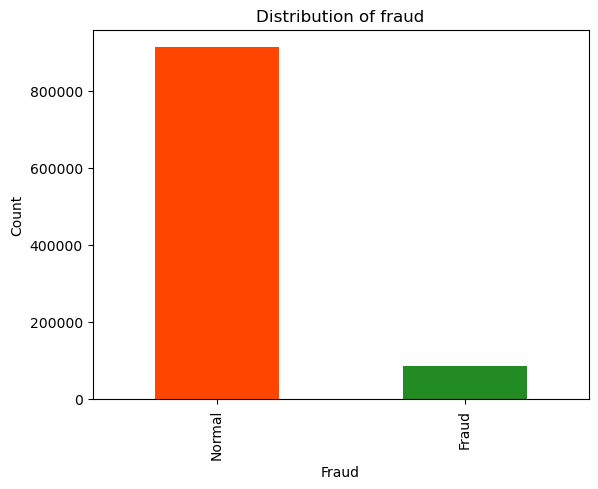

In [5]:
import matplotlib.pyplot as plt


try:
    from matplotlib import mpatches  # Try importing mpatches
except ImportError:
    from matplotlib.patches import Patch  # Fallback to Patch class

# Plotting the bar chart
df['fraud'].value_counts().plot(kind='bar', color=['orangered', 'forestgreen'])
plt.title('Distribution of fraud')


# Add labels for the x and y axes
LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), LABELS)
plt.xlabel('Fraud')
plt.ylabel('Count')

plt.show()

In [ ]:
# Function to create a bar chart
def create_bar_chart(column_name):
    plt.figure(figsize=(8, 6))
    df[column_name].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()


# List of columns to create bar charts for
columns_to_plot = ['distance_from_home', 'distance_from_last_transaction',
                   'ratio_to_median_purchase_price', 'repeat_retailer',
                   'used_chip', 'used_pin_number', 'online_order','fraud']

# Create bar charts for each column
for column in columns_to_plot:
    create_bar_chart(column)

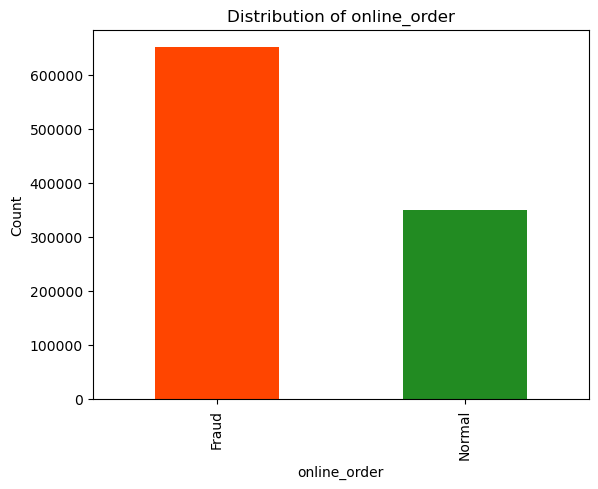

In [7]:
# Count the occurrences of online_order (0 and 1)
fraud_counts = df['online_order'].value_counts().plot(kind='bar', color=['orangered', 'forestgreen'])

# Create the bar chart
fraud_counts.plot(kind='bar', rot=0)

# Add labels and title
LABELS = ["Fraud", "Normal"]
plt.xticks(range(2), LABELS)
plt.xlabel('online_order')
plt.ylabel('Count')
plt.title('Distribution of online_order')

plt.show()

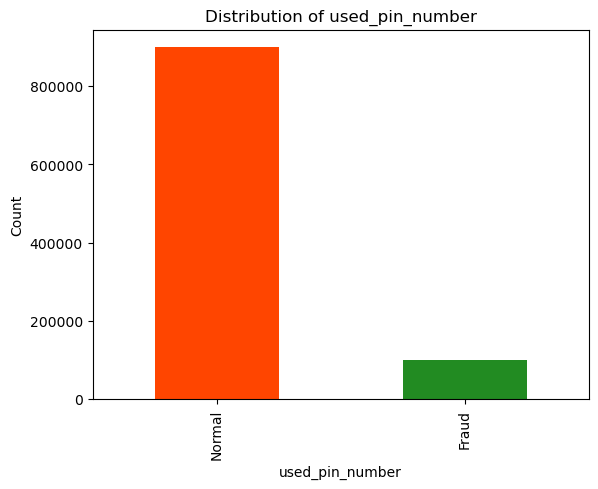

In [8]:
# Count the occurrences of used_pin_number (0 and 1)
fraud_counts = df['used_pin_number'].value_counts().plot(kind='bar', color=['orangered', 'forestgreen'])

# Create the bar chart
fraud_counts.plot(kind='bar')

# Add labels and title
LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), LABELS)
plt.xlabel('used_pin_number')
plt.ylabel('Count')
plt.title('Distribution of used_pin_number')

plt.show()

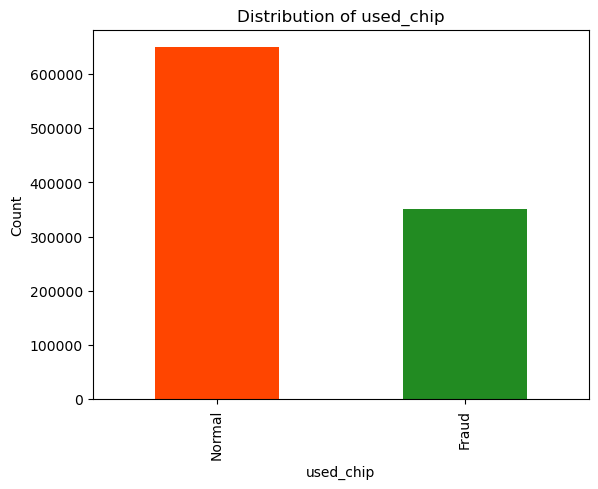

In [9]:
# Count the occurrences of used_chip (0 and 1)
fraud_counts = df['used_chip'].value_counts().plot(kind='bar', color=['orangered', 'forestgreen'])

# Create the bar chart
fraud_counts.plot(kind='bar')

# Add labels and title
LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), LABELS)
plt.xlabel('used_chip')
plt.ylabel('Count')
plt.title('Distribution of used_chip')

plt.show()

In [ ]:
# Count the occurrences of repeat_retailer (0 and 1)
fraud_counts = df['repeat_retailer'].value_counts().plot(kind='bar', color=['OrRd', 'mediumseagreen'])

# Create the bar chart
fraud_counts.plot(kind='bar', rot=0)

# Add labels and title
LABELS = ["Fraud", "Normal"]
plt.xticks(range(2), LABELS)
plt.xlabel('repeat_retailer')
plt.ylabel('Count')
plt.title('Distribution of repeat_retailer')

plt.show()

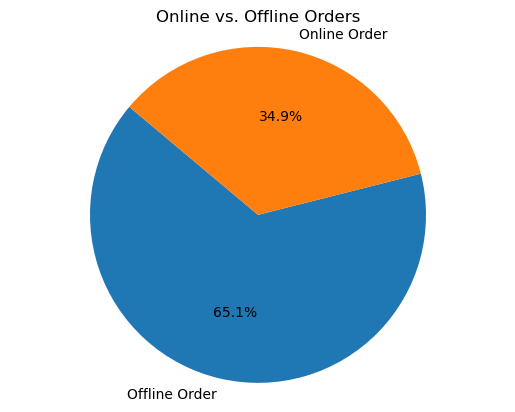

In [18]:
# Count the occurrences of 0 and 1 in the 'online_ord' column
online_ord_counts = df['online_order'].value_counts()

# Create the pie chart
plt.pie(online_ord_counts, labels=['Offline Order', 'Online Order'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio for a circular pie chart
plt.title('Online vs. Offline Orders')
plt.show()

D:\Newfolder\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


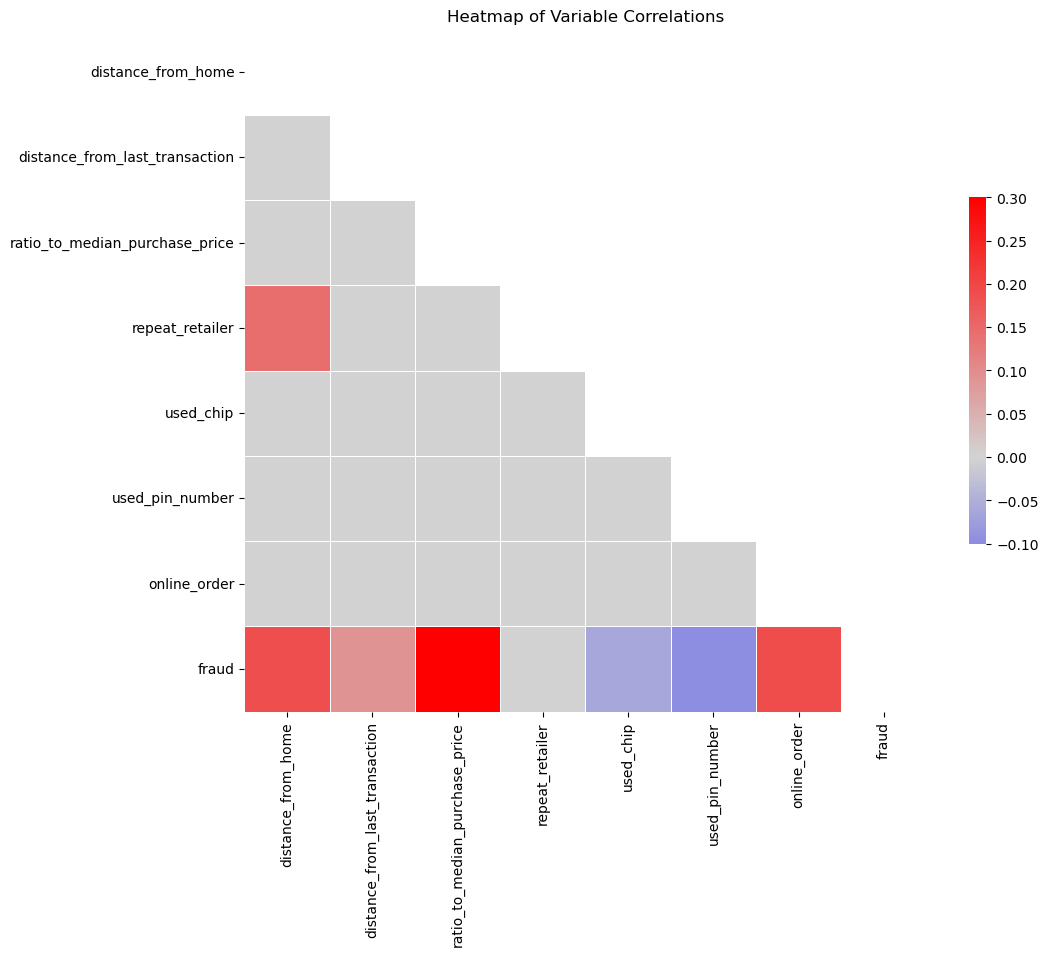

In [10]:
##Correlation heatmap

# Compute the correlation matrix
corr = df[['distance_from_home', 'distance_from_last_transaction','ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip','used_pin_number', 'online_order', 'fraud']].corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
import matplotlib.colors as colors

# Define color values for low, medium, and high correlations
low_color = colors.to_rgb('blue')
mid_color = colors.to_rgb('lightgrey')
high_color = colors.to_rgb('red')

# Create a linear segmented colormap
cmap = colors.LinearSegmentedColormap.from_list("", [low_color, mid_color, high_color])
# Draw the heatmap with the mask, correct aspect ratio, and annotations
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Heatmap of Variable Correlations')
plt.show()

D:\Newfolder\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


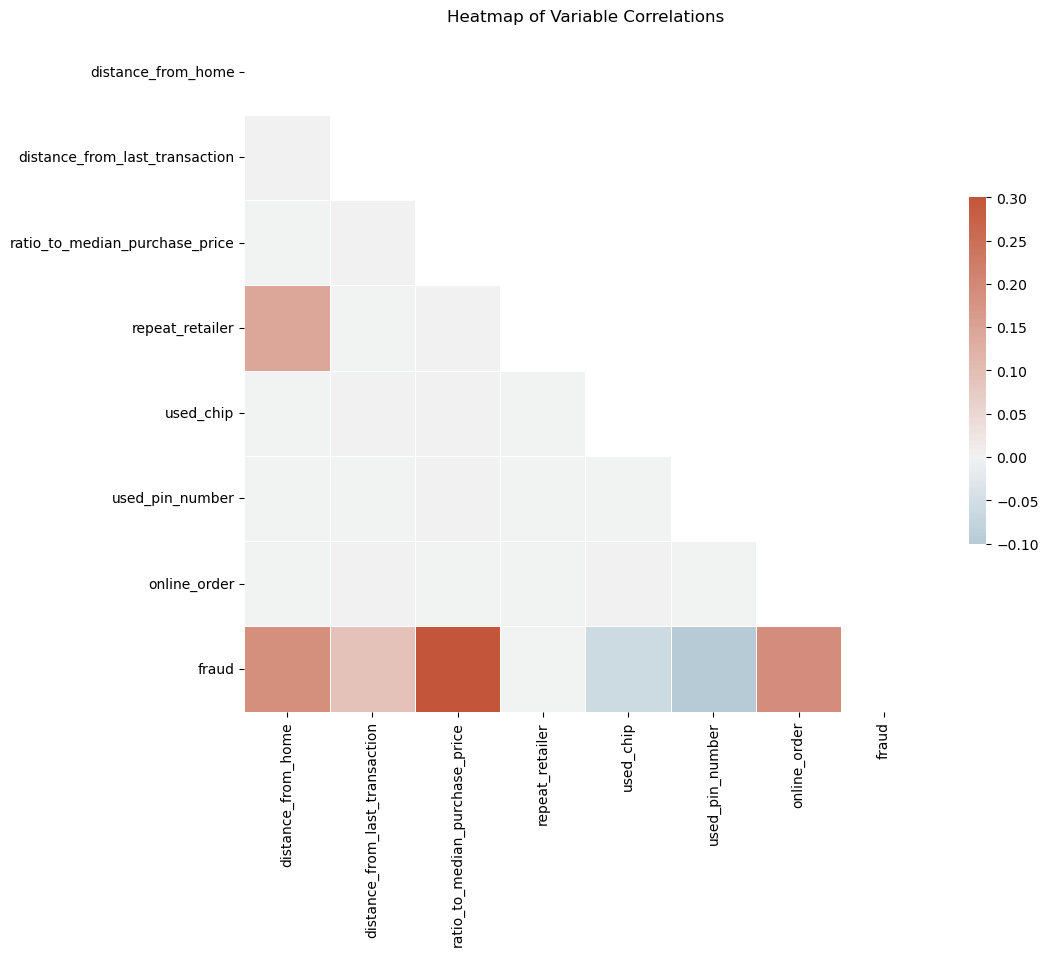

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors

# Compute the correlation matrix
corr = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a diverging color palette for the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask, correct aspect ratio, and annotations
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Heatmap of Variable Correlations')
plt.show()

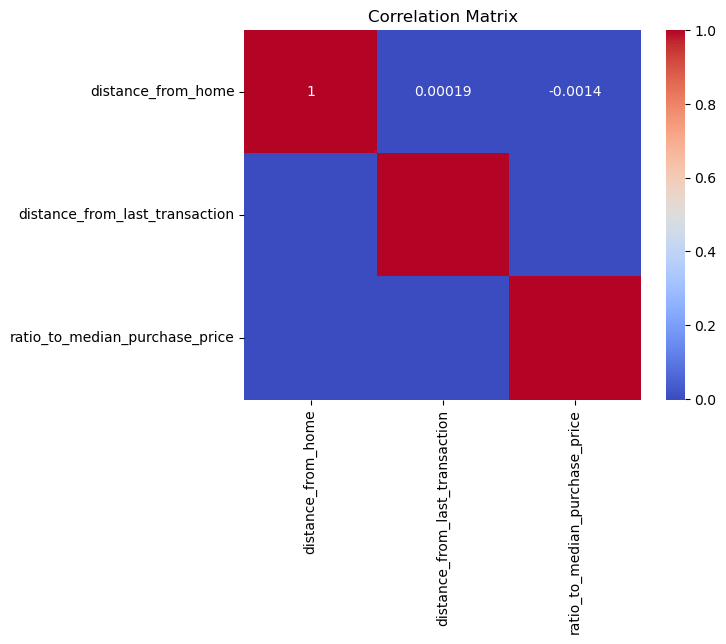

In [19]:
#To visualize the correlation between numerical columns:


import seaborn as sns

# Correlation matrix
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

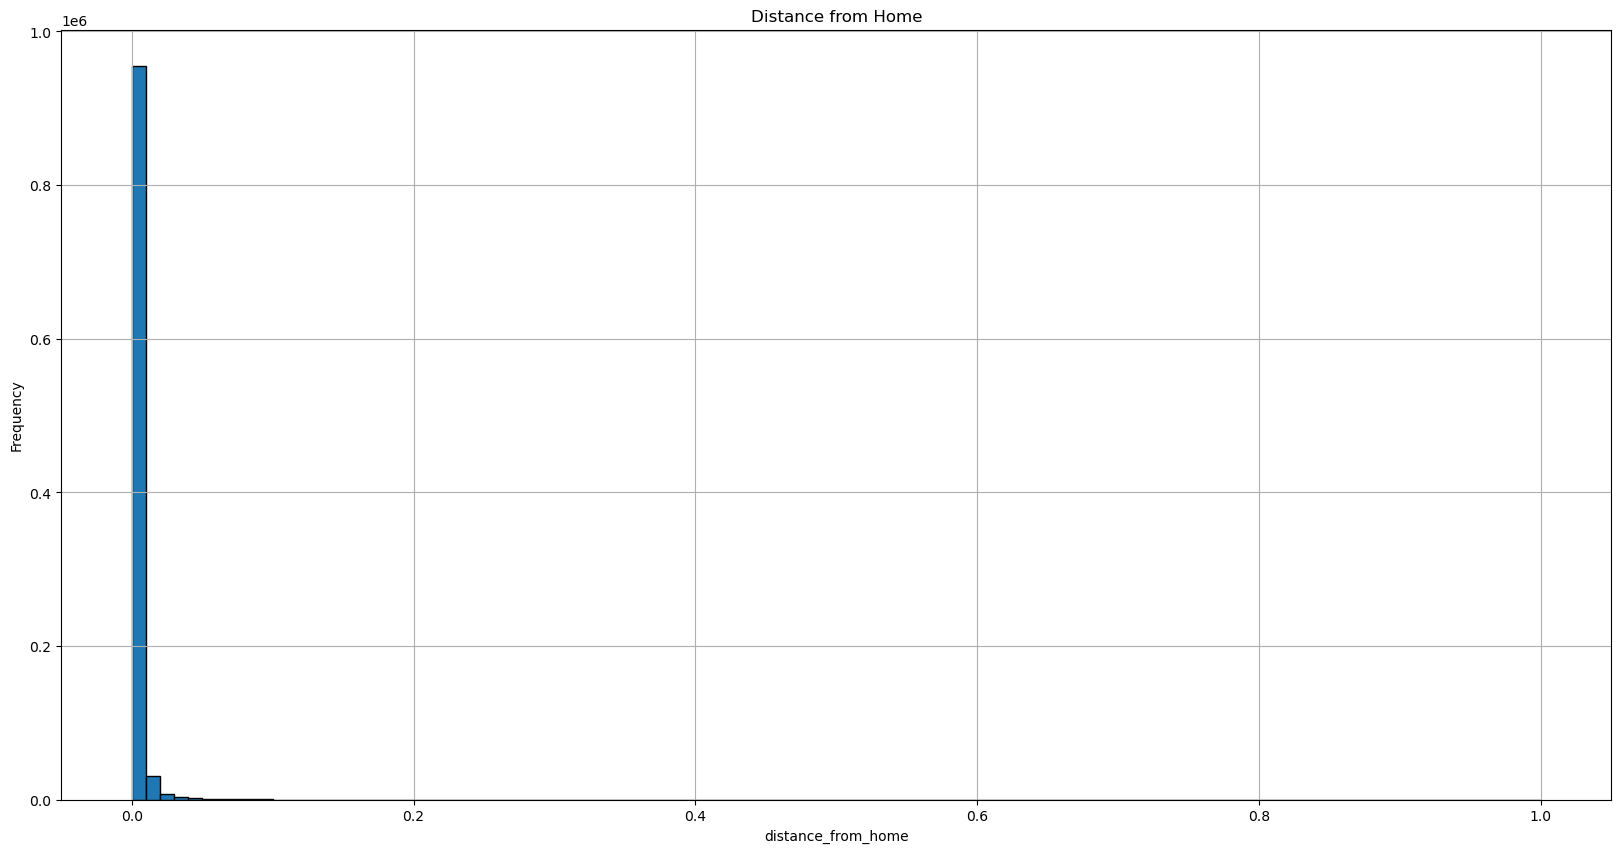

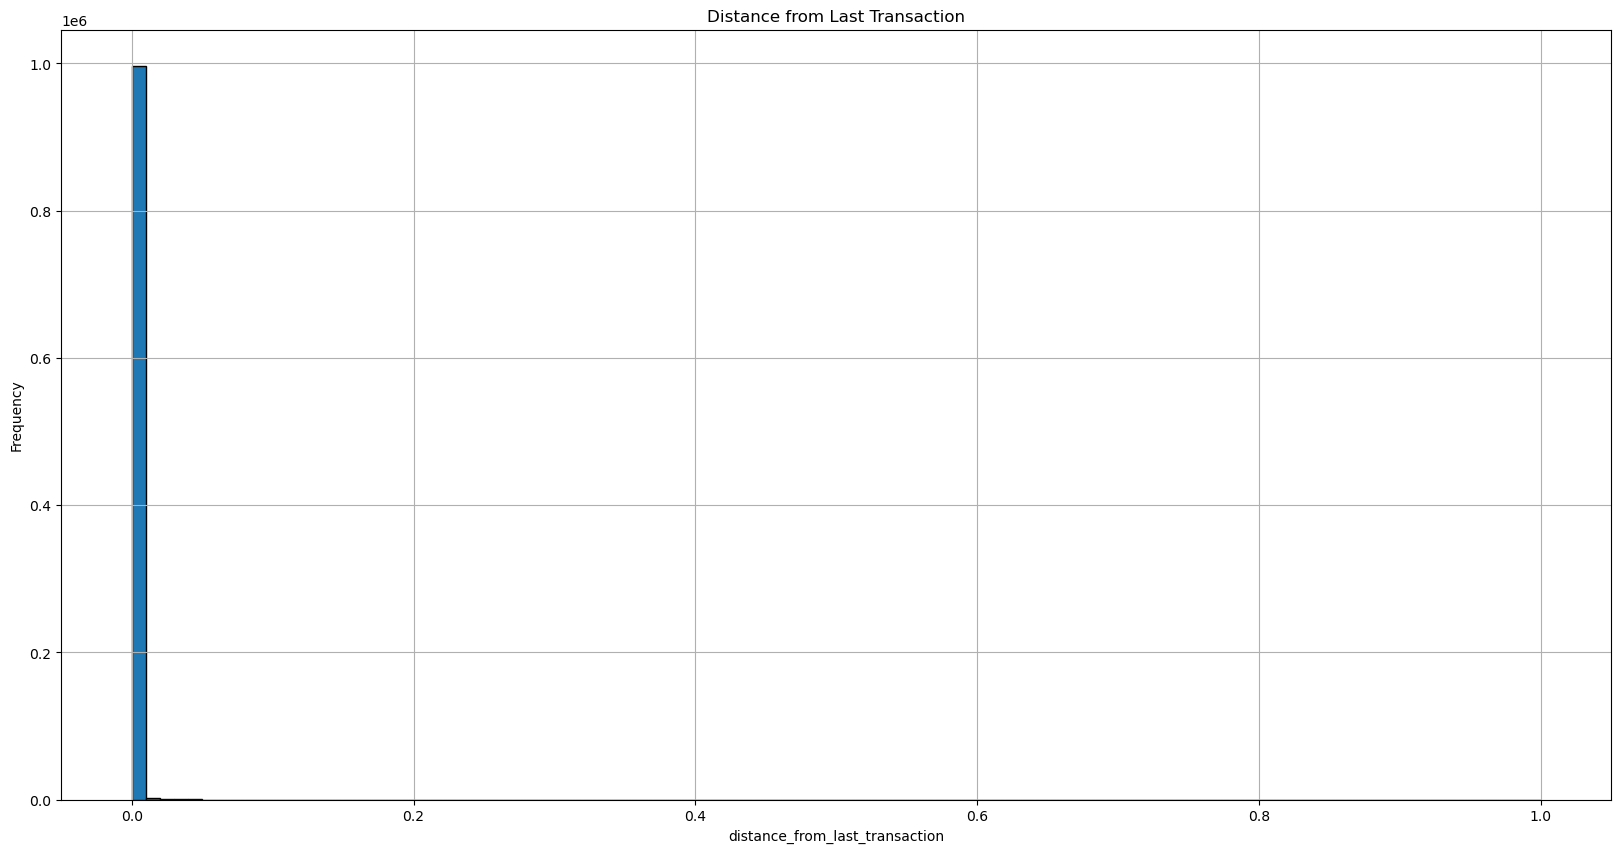

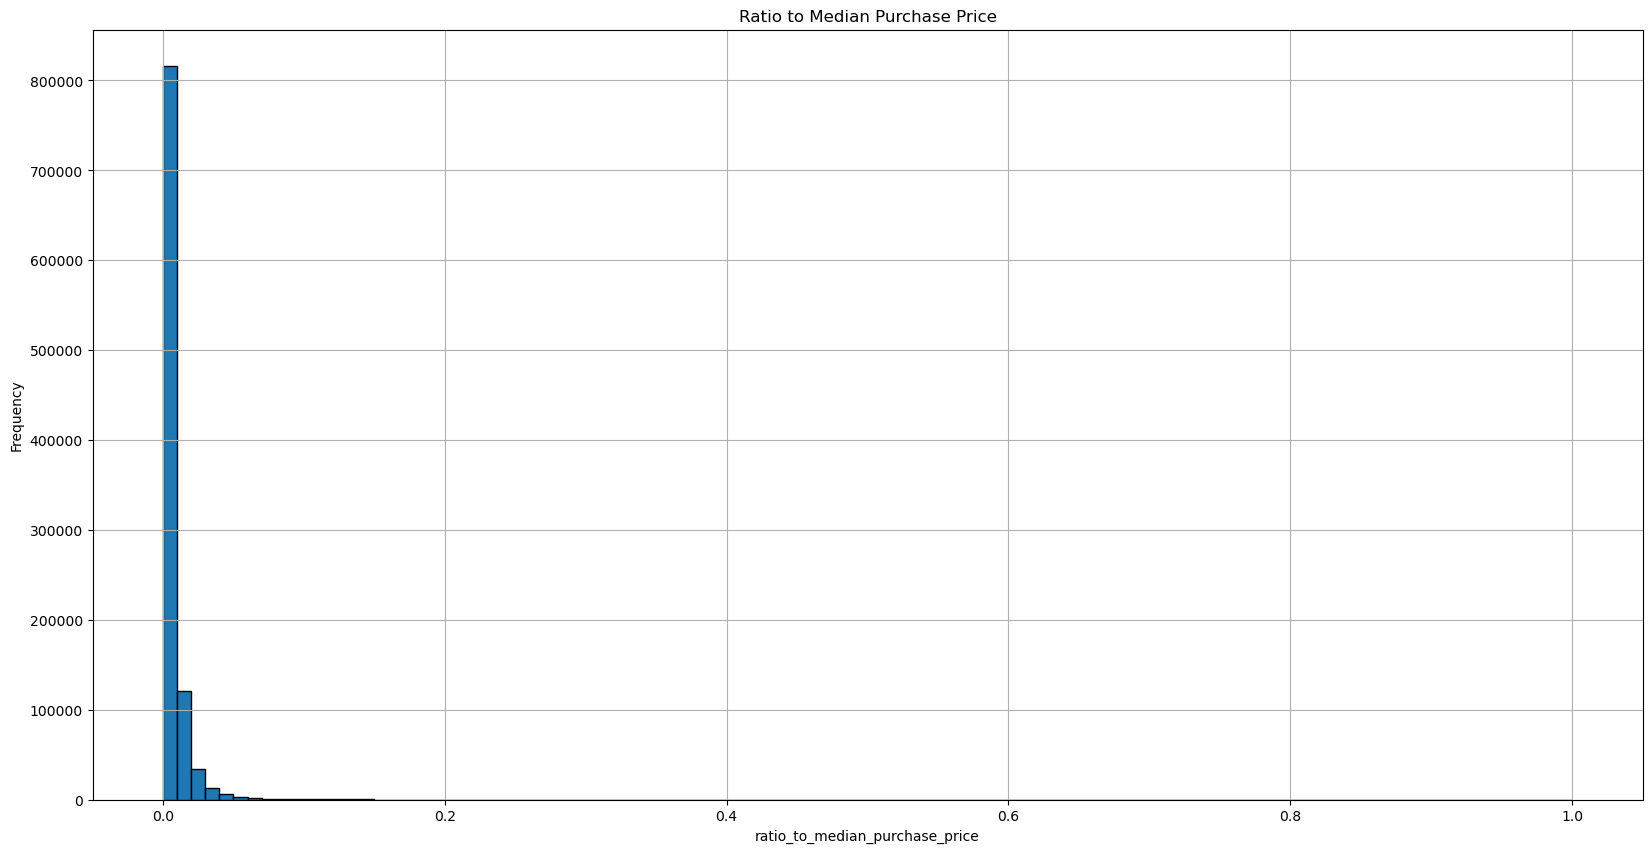

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']])

features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
titles = ['Distance from Home', 'Distance from Last Transaction', 'Ratio to Median Purchase Price']

for i, feature in enumerate(features):
    plt.figure(figsize=(20, 10))
    plt.hist(df_scaled[:, i], bins=100, edgecolor='black')
    plt.title(titles[i])
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

D:\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


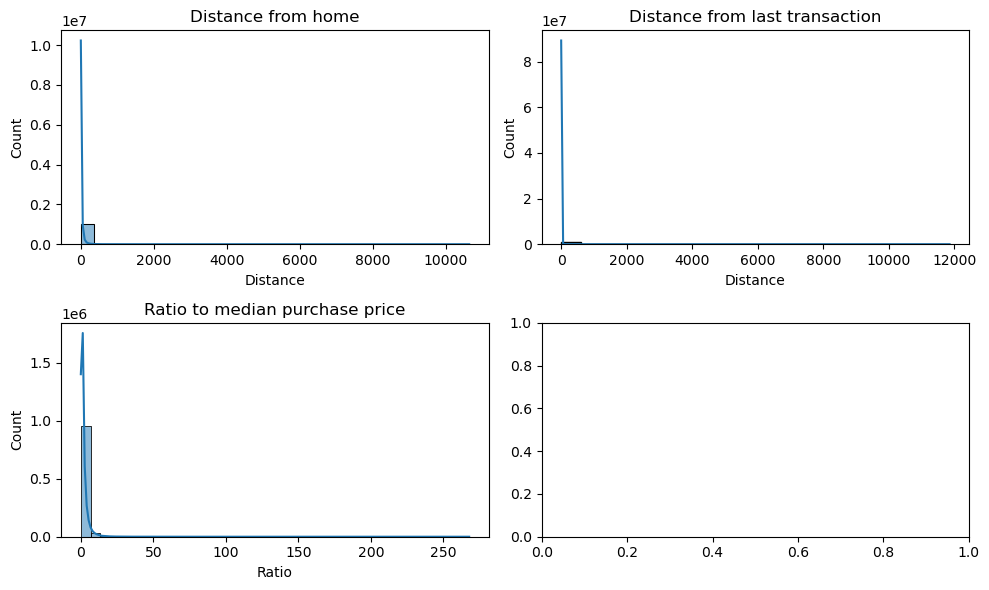

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Create histograms for each feature
sns.histplot(data=df, x="distance_from_home", bins=30, ax=axs[0, 0], kde=True)
sns.histplot(data=df, x="distance_from_last_transaction", bins=20, ax=axs[0, 1], kde=True)
sns.histplot(data=df, x="ratio_to_median_purchase_price", bins=40, ax=axs[1, 0], kde=True)

# Add labels and title
axs[0, 0].set_title('Distance from home')
axs[0, 0].set_xlabel('Distance')
axs[0, 0].set_ylabel('Count')

axs[0, 1].set_title('Distance from last transaction')
axs[0, 1].set_xlabel('Distance')
axs[0, 1].set_ylabel('Count')

axs[1, 0].set_title('Ratio to median purchase price')
axs[1, 0].set_xlabel('Ratio')
axs[1, 0].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

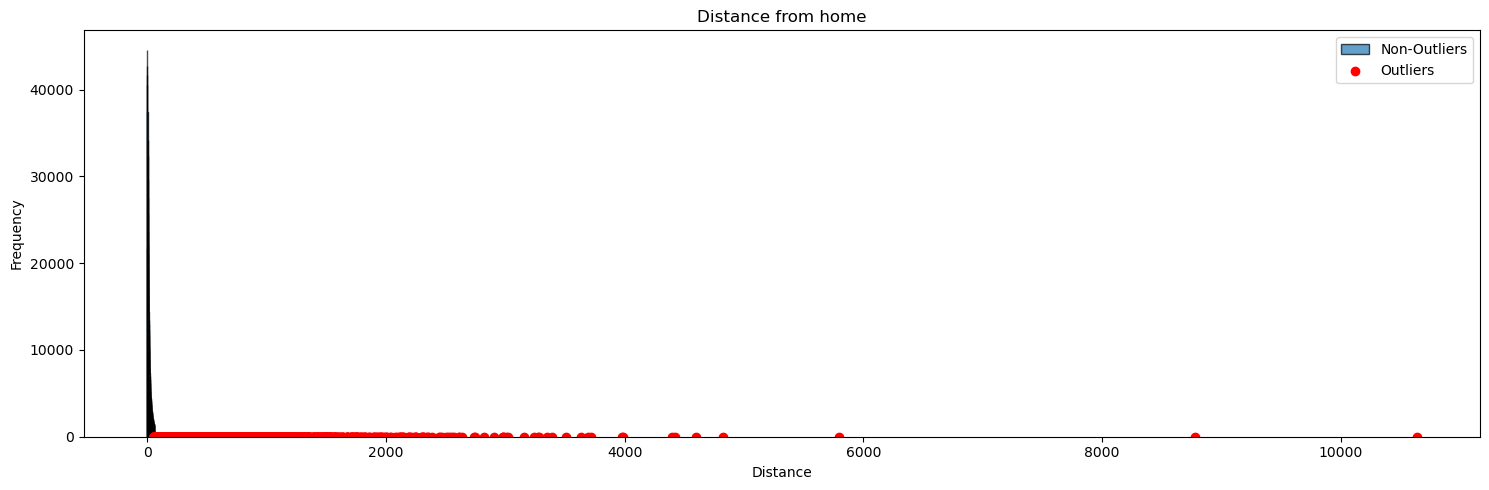

In [53]:
import numpy as np
import matplotlib.pyplot as plt



# Identify potential outliers using IQR
Q1 = np.percentile(df['distance_from_home'], 25)
Q3 = np.percentile(df['distance_from_home'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Create a mask to separate outliers and non-outliers
outliers = (df['distance_from_home'] < lower_bound) | (df['distance_from_home'] > upper_bound)

# Plot the histogram with different options
fig, ax = plt.subplots(figsize=(15, 5))

# Plot non-outliers with more bins
ax.hist(df[~outliers]['distance_from_home'], bins=100, edgecolor='black', alpha=0.7, label='Non-Outliers')

# Plot outliers as separate points (optional)
ax.scatter(df[outliers]['distance_from_home'], np.zeros_like(df[outliers]['distance_from_home']), c='red', label='Outliers')

# Customize the plot and add legend
ax.set_title('Distance from home')
ax.set_xlabel('Distance')
ax.set_ylabel('Frequency')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
#To visualize relationships between numerical columns:
import seaborn as sns

# Pairwise scatter plot
sns.pairplot(df[numerical_cols])
plt.show()

D:\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


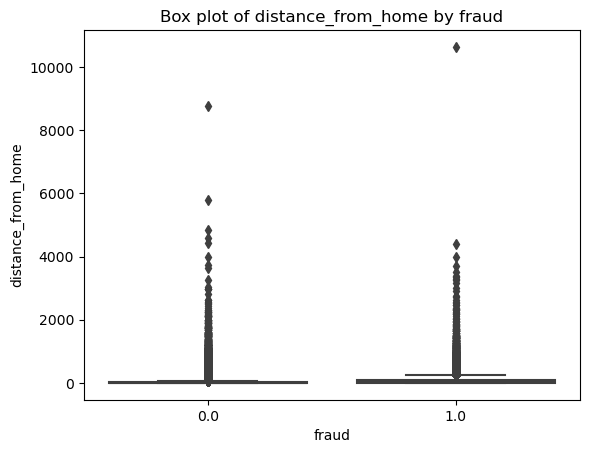

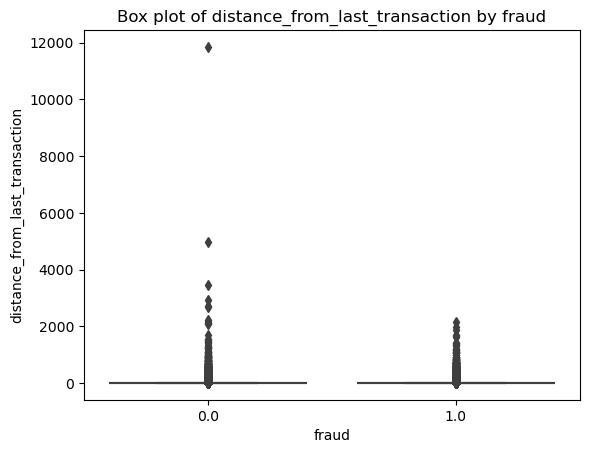

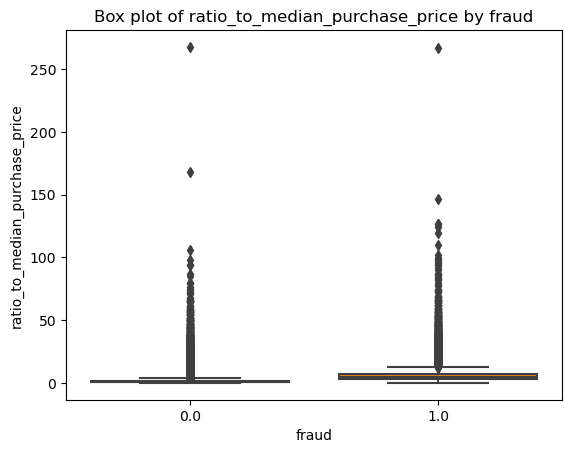

In [5]:
#To visualize the distribution of numerical data by categorical variables:
import seaborn as sns

# Box plots for numerical columns by 'fraud'
for col in numerical_cols:
    sns.boxplot(x='fraud', y=col, data=df)
    plt.title(f'Box plot of {col} by fraud')
    plt.show()

In [ ]:
import seaborn as sns
import numpy as np

def jitter(x, frac=0.1):
    """Jitters data points to avoid overlap on categorical plots."""
    return x + np.random.rand(len(x)) * frac * (1 - np.random.rand(len(x)))

# Ensure 'distance_from_home' is numeric
df['distance_from_home'] = pd.to_numeric(df['distance_from_home'], errors='coerce')

sns.boxplot(
    x="fraud",
    y="distance_from_home",
    showmeans=True,
    data=df,
    order=["0", "1"]
)
sns.swarmplot(
    x="fraud",
    y=jitter(df['distance_from_home'], 0.05),
    data=df,
    size=2,
    alpha=0.7,
    color=".2"
)
plt.title('Distribution of distance_from_home by fraud')
plt.xlabel('Fraud')
plt.ylabel('distance_from_home')
plt.show()


D:\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
